# 03/17/21 - This notebook simulates the best fit model for 2730 as imaging for VST, VRO and HST (psf 0.65, 0.2, 0.1)

In [2]:
# libraries

from pyprojroot import here
print(f'You are here: {here()}')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
#import matplotlib.patches as patches
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import scipy.stats as stats
from os import path

%matplotlib inline

from astropy import constants as const
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

# paths
autoz_path = f'{here()}/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
latest_path = f'{csv_path}latest/'
visual_path = f'{autoz_path}visuals/'
png_path = f'{visual_path}png/'
pdf_path = f'{visual_path}pdf/'
knabel2020_file_path = '/data/sknabel/lens_methods/files/'

gama_id = 3629152
links_id = 1933

object_folder = f'{fits_path}G{gama_id}_{links_id}/'
output_folder = f'{autoz_path}output/G{gama_id}_{links_id}/'

You are here: /data/sknabel/autoz_lens_model


In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

Plotting r-band


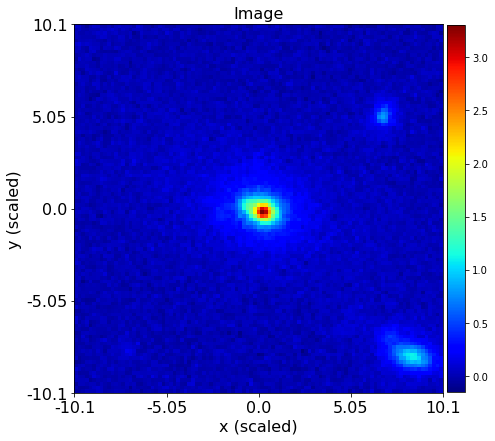

Plotting g-band


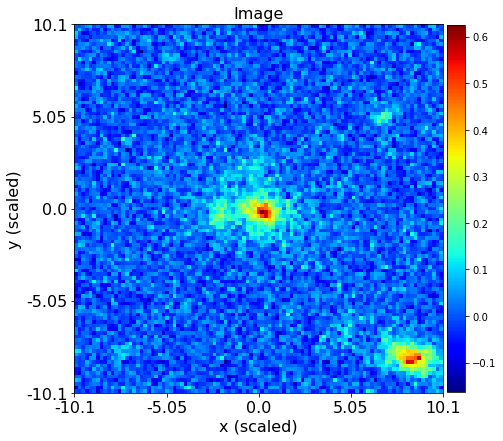

In [3]:
# load r-band imaging
imaging_r = al.Imaging.from_fits(image_path=path.join(object_folder, f'{links_id}_r_image.fits'),
                              noise_map_path=path.join(object_folder, f'{links_id}_r_noise_map_image.fits'),
                              psf_path=path.join(object_folder, f'{links_id}_r_psf_image.fits'),
                               pixel_scales=0.2)

# load g-band imaging
imaging_g = al.Imaging.from_fits(image_path=path.join(object_folder, f'{links_id}_g_image.fits'),
                              noise_map_path=path.join(object_folder, f'{links_id}_g_noise_map_image.fits'),
                              psf_path=path.join(object_folder, f'{links_id}_g_psf_image.fits'),
                               pixel_scales=0.2)

# plot images for first view
print('Plotting r-band')
imaging_plotter_r = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging_r,# visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter_r.figures(image=True)
print('Plotting g-band')
imaging_plotter_g = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging_g,# visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter_g.figures(image=True)

In [4]:
# aggregator pulls in results from output folder
agg = af.Aggregator(directory=f'{output_folder}experiment_4_phase3_fit_120321')
model = agg.model_results

print(model)

Aggregator loading phases... could take some time.

 A total of 1 phases and results were found.


Bayesian Evidence                                                                         1558.27577347
Maximum Likelihood                                                                        1593.15763522

Maximum Log Likelihood Model:

galaxies
    lens
        bulge
            elliptical_comps
                elliptical_comps_0                                                        -0.214
                elliptical_comps_1                                                        0.279
            intensity                                                                     0.034
            sersic_index                                                                  3.501
            mass_to_light_ratio                                                           8.550
            effective_radius                                                              2.228
        dark
          

In [5]:
# take the samples info for the max log likelihood, etc.
results = list(agg.values("samples"))[0]
# max log likelihood instance won't load because it's outside the bounds of my priors... which is stupid af.
print(results.max_log_likelihood_instance)
sample = results.max_log_likelihood_sample
instance = sample.instance_for_model(results.max_log_likelihood_sample)
print(instance)

PriorLimitException: The physical value 2.22845851953622 for a prior was not within its limits 0.0, 2.1135294437408447

In [6]:
help(results)

Help on NestSamples in module autofit.non_linear.samples object:

class NestSamples(PDFSamples)
 |  NestSamples(model: autofit.mapper.model_mapper.ModelMapper, samples: List[autofit.non_linear.samples.Sample], number_live_points: int, log_evidence: float, total_samples: float, unconverged_sample_size: int = 100, time: float = None)
 |  
 |  Method resolution order:
 |      NestSamples
 |      PDFSamples
 |      OptimizerSamples
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model: autofit.mapper.model_mapper.ModelMapper, samples: List[autofit.non_linear.samples.Sample], number_live_points: int, log_evidence: float, total_samples: float, unconverged_sample_size: int = 100, time: float = None)
 |      The *Output* classes in **PyAutoFit** provide an interface between the results of a `NonLinearSearch` (e.g.
 |      as files on your hard-disk) and Python.
 |      
 |      For example, the output class can be used to load an instance of the best-fit model, g

In [11]:
instance = results.median_pdf_instance
print(instance.galaxies.lens)

Redshift: [0.40662315]
Light Profiles:
EllipticalSersic
centre: (-0.09977304157510128, 0.09981813647810622)
elliptical_comps: (-0.18325600373395431, 0.13298506076531313)
axis_ratio: 0.6307575019633196
phi: -27.01619525931616
mass_to_light_ratio: 5.7030699093746
intensity: 0.03885333355525738
effective_radius: 2.037111021516207
sersic_index: 3.16224160368636
id: 92
_assertions: []
cls: <class 'autogalaxy.profiles.light_and_mass_profiles.EllipticalSersic'>
Mass Profiles:
EllipticalSersic
centre: (-0.09977304157510128, 0.09981813647810622)
elliptical_comps: (-0.18325600373395431, 0.13298506076531313)
axis_ratio: 0.6307575019633196
phi: -27.01619525931616
mass_to_light_ratio: 5.7030699093746
intensity: 0.03885333355525738
effective_radius: 2.037111021516207
sersic_index: 3.16224160368636
id: 92
_assertions: []
cls: <class 'autogalaxy.profiles.light_and_mass_profiles.EllipticalSersic'>
SphericalNFWMCRLudlow
mass_at_200: 30713640082.05637
redshift_object: [0.40662315]
redshift_source: [0.787

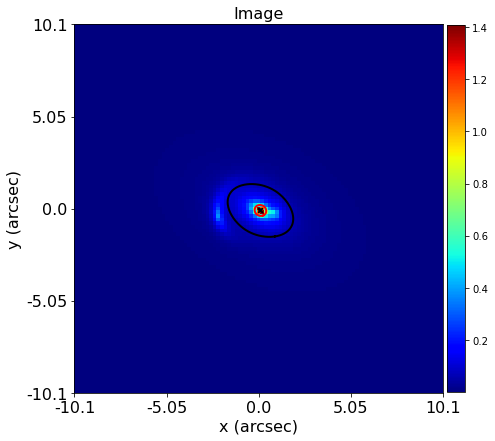

In [83]:
# let's take this median pdf instance to create our simulated lens
lens = instance.galaxies.lens
source = instance.galaxies.source

grid = al.Grid2DIterate.uniform(
    shape_native=(101, 101), pixel_scales=0.2, fractional_accuracy=0.9999
)

hst_grid = al.Grid2DIterate.uniform(
    shape_native=(404, 404), pixel_scales=0.05, fractional_accuracy=0.9999
)

tracer = al.Tracer.from_galaxies(
    galaxies=[lens, source], cosmology=cosmo
)

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

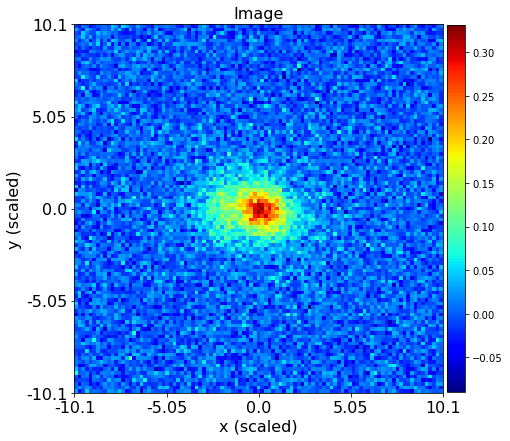

In [84]:
# simulate the VST image quality exactly as it would have been for our images
vst_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.65, pixel_scales=grid.pixel_scales, renormalize=True)

vst_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=vst_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = vst_simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

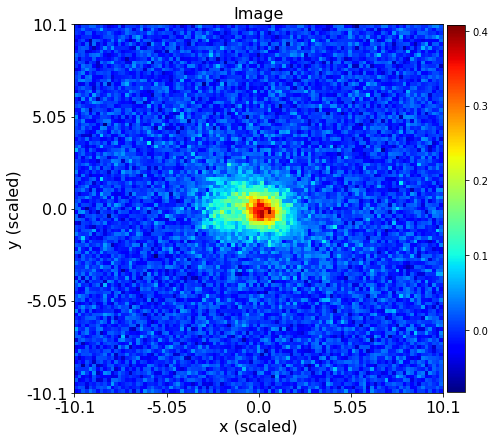

In [85]:
# simulate the VRO image quality
vro_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.5, pixel_scales=0.2)

vro_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=vro_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = vro_simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)


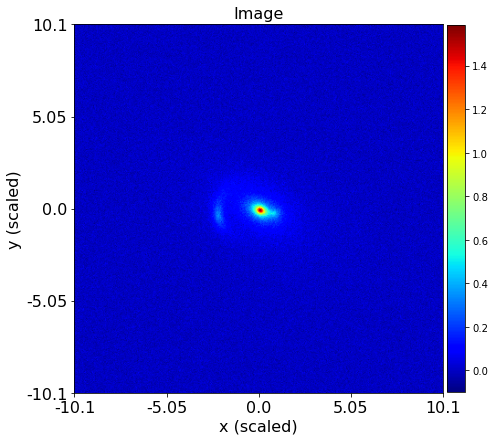

In [86]:
# simulate the HST image quality
hst_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.1, pixel_scales=hst_grid.pixel_scales)

hst_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=hst_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = hst_simulator.from_tracer_and_grid(tracer=tracer, grid=hst_grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)


## Simulate a pretty lens just to see what it looks like.

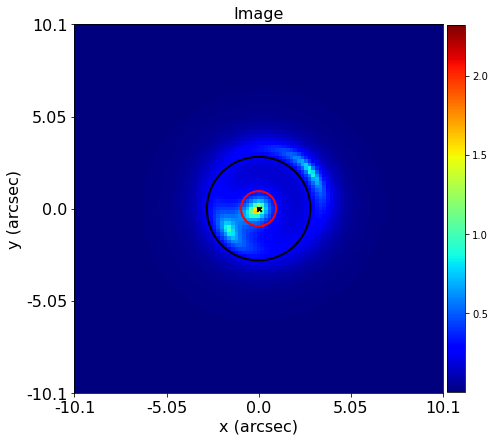

In [100]:
lens_galaxy_0 = al.Galaxy(
    redshift=0.2,
    bulge=al.lmp.EllipticalSersic(
        centre=(0.0, 0.0),
        elliptical_comps = al.convert.elliptical_comps_from(axis_ratio=0.9,phi=45.0),
        intensity=0.06,
        effective_radius=2.5,
        sersic_index=2.5,
        mass_to_light_ratio=0.2,
    ),
    #disk=al.lmp.EllipticalExponential(
    #    centre=(0.0, 0.0),
    #    elliptical_comps = al.convert.elliptical_comps_from(axis_ratio=0.9,phi=45.0),
    #    intensity=1.0,
    #    effective_radius=2.0,
    #    mass_to_light_ratio=0.2,
    #),
    dark=al.mp.SphericalNFW(centre=(0.0, 0.0), kappa_s=0.315, scale_radius=10.0),
)

#lens_galaxy_1 = al.Galaxy(
#    redshift=1.0,
#    light=al.lp.EllipticalExponential(
#        centre=(0.1, 0.1), , elliptical_comps=(0.1, 0.1), intensity=3.0, effective_radius=0.1
#    ),
#    mass=al.mp.EllipticalIsothermal(
#        centre=(0.1, 0.1), , elliptical_comps=(0.1, 0.1), einstein_radius=0.4
#    ),
#)

source_galaxy = al.Galaxy(
    redshift=0.7,
    light=al.lp.EllipticalSersic(
        centre=(0.25, 0.35),
        elliptical_comps=(-0.055555,0.096225),
        intensity=0.085,
        effective_radius=0.8,
        sersic_index=1.5,
    ),
)


tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy_0, source_galaxy])

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

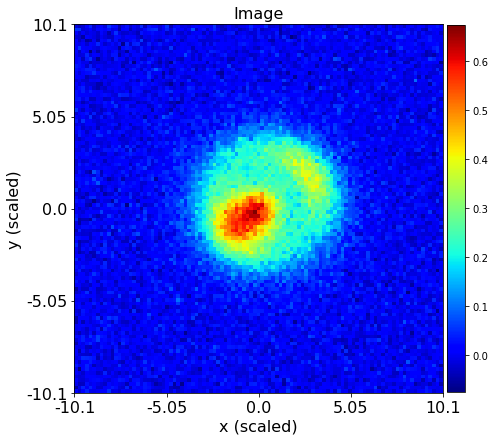

In [101]:
# simulate the VST image quality exactly as it would have been for our images
vst_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.65, pixel_scales=grid.pixel_scales, renormalize=True)

vst_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=vst_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = vst_simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

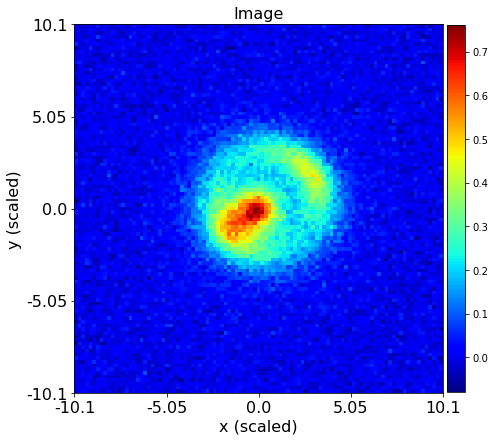

In [102]:
# simulate the VRO image quality
vro_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.5, pixel_scales=0.2)

vro_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=vro_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = vro_simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)


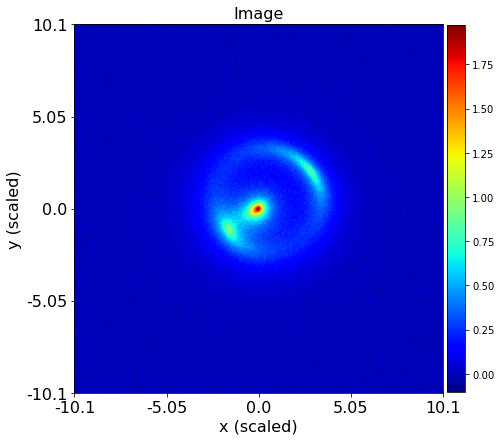

In [103]:
# simulate the HST image quality
hst_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.1, pixel_scales=hst_grid.pixel_scales)

hst_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=hst_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = hst_simulator.from_tracer_and_grid(tracer=tracer, grid=hst_grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

## Try to manually put in the max log likelihood model.

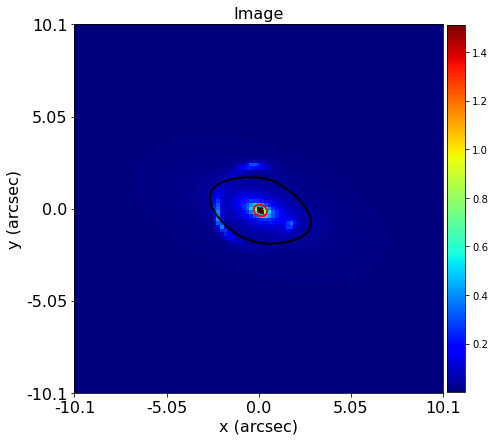

In [94]:
lens = al.Galaxy(
    redshift=instance.galaxies.lens.redshift,
    bulge=al.lmp.EllipticalSersic(elliptical_comps=(-0.214, 0.279),
                                  centre=(-0.09977304157510128, 0.09981813647810622),
                                 intensity=0.034,
                                 sersic_index=3.501,
                                 mass_to_light_ratio=8.550,
                                 effective_radius=2.228),
    dark=al.mp.SphericalNFWMCRLudlow(mass_at_200=130966678743.191)
)

source = al.Galaxy(
    redshift=instance.galaxies.source.redshift,
    bulge=al.lp.SphericalExponential(intensity=0.112,
                                     centre=(0.221, -0.212),
                                     effective_radius=0.232)
)

tracer = al.Tracer.from_galaxies(galaxies=[lens, source])

tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=grid)
tracer_plotter.figures(image=True)

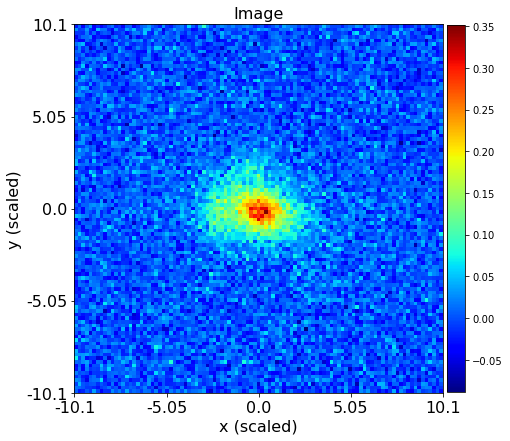

In [95]:
# simulate the VST image quality exactly as it would have been for our images
vst_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.65, pixel_scales=grid.pixel_scales, renormalize=True)

vst_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=vst_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = vst_simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

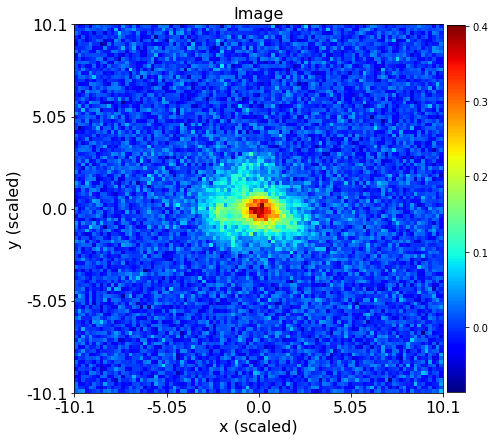

In [96]:
# simulate the VRO image quality
vro_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.5, pixel_scales=0.2)

vro_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=vro_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = vro_simulator.from_tracer_and_grid(tracer=tracer, grid=grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)


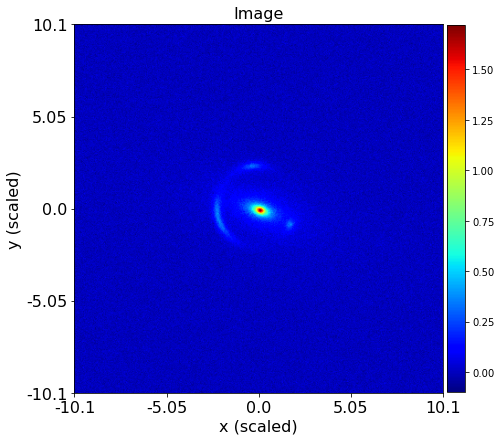

In [98]:
# simulate the HST image quality
hst_psf = al.Kernel2D.from_gaussian(shape_native=(21, 21), sigma=0.1, pixel_scales=hst_grid.pixel_scales)

hst_simulator = al.SimulatorImaging(
    exposure_time=1800.0, background_sky_level=1.0, psf=hst_psf, add_poisson_noise=True # exp time depends on band (900, 1200, 1800)
)

imaging = hst_simulator.from_tracer_and_grid(tracer=tracer, grid=hst_grid)

"""
By plotting a subplot of the `Imaging` dataset, we can see this object includes the observed image of the strong lens
(which has had noise and other instrumental effects added to it) as well as a noise-map and PSF:
"""
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)